###**Introduction**

The Superstore Sales dataset provides a comprehensive view of sales data over a period, encompassing various product categories, geographic regions, and customer segments. This analysis aims to extract insights and build predictive models to better understand sales trends and make informed business decisions.

###**Dataset Overview**

The dataset comprises sales data from a superstore, including information such as order date, ship date, product category, sales region, customer segment, shipping mode, and sales amount. It contains both numeric and categorical features, providing a rich source of information for analysis.

###**Goal of Analysis**

The primary goal is to gain actionable insights into sales trends, patterns, and drivers within the superstore. By exploring the data, we aim to identify key factors influencing sales performance, such as product categories, geographic regions, customer segments, and shipping modes. Additionally, we seek to develop predictive models to forecast future sales accurately.

###**Importance of Insights**

Understanding sales dynamics is crucial for optimizing inventory management, resource allocation, and marketing strategies. By uncovering insights from the data, the superstore can identify high-performing product categories, target lucrative customer segments, optimize shipping operations, and anticipate demand fluctuations. These insights enable data-driven decision-making, leading to improved operational efficiency, customer satisfaction, and overall business performance.

###**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer

###**Load Dataset**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/superstore_final_dataset.csv", encoding='ISO-8859-1')
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [3]:
# Information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
# Description about the Dataset
df.describe()

,Row_ID,Postal_Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


###**Exploratory Data Analysis**

**Data Quality Check**

In [5]:
# Checking for the Duplicates
df.duplicated().sum()

np.int64(0)

There is no duplicate values in the dataset.

In [6]:
# Checking for the null values
missing_values = df.isnull().sum()
total_missing = missing_values.sum()
total_cells = np.prod(df.shape)
missing_percentage = (total_missing / total_cells) * 100


print(f"Percentage of Missing Values: {missing_percentage:.2f}%")
print(missing_values)

Percentage of Missing Values: 0.01%
Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64


In [9]:
# Drop the missing values
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

,0
Row_ID,0
Order_ID,0
Order_Date,0
Ship_Date,0
Ship_Mode,0
Customer_ID,0
Customer_Name,0
Segment,0
Country,0
City,0


Now there is no missing value in the dataset.

**Checking Unique Values in each column.**

In [11]:
for column in df.columns:
    unique_values = df[column].unique()
    num_distinct_values = len(unique_values)
    print(f"Column '{column}' has {num_distinct_values} distinct values")

Column 'Row_ID' has 9789 distinct values
Column 'Order_ID' has 4916 distinct values
Column 'Order_Date' has 1229 distinct values
Column 'Ship_Date' has 1326 distinct values
Column 'Ship_Mode' has 4 distinct values
Column 'Customer_ID' has 793 distinct values
Column 'Customer_Name' has 793 distinct values
Column 'Segment' has 3 distinct values
Column 'Country' has 1 distinct values
Column 'City' has 529 distinct values
Column 'State' has 48 distinct values
Column 'Postal_Code' has 626 distinct values
Column 'Region' has 4 distinct values
Column 'Product_ID' has 1860 distinct values
Column 'Category' has 3 distinct values
Column 'Sub_Category' has 17 distinct values
Column 'Product_Name' has 1848 distinct values
Column 'Sales' has 5750 distinct values


**Data Type Conversion**

In [13]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d/%m/%Y') # Specify the correct format for day/month/year
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format='%d/%m/%Y') # Apply the same format to 'Ship_Date'

df['year_order_date'] = df['Order_Date'].dt.year
df['month_order_date'] = df['Order_Date'].dt.month
df['weekday_order_date'] = df['Order_Date'].dt.weekday

df['year_ship_date'] = df['Ship_Date'].dt.year
df['month_ship_date'] = df['Ship_Date'].dt.month
df['weekday_ship_date'] = df['Ship_Date'].dt.weekday

In [14]:
# Checking Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Row_ID              9789 non-null   int64         
 1   Order_ID            9789 non-null   object        
 2   Order_Date          9789 non-null   datetime64[ns]
 3   Ship_Date           9789 non-null   datetime64[ns]
 4   Ship_Mode           9789 non-null   object        
 5   Customer_ID         9789 non-null   object        
 6   Customer_Name       9789 non-null   object        
 7   Segment             9789 non-null   object        
 8   Country             9789 non-null   object        
 9   City                9789 non-null   object        
 10  State               9789 non-null   object        
 11  Postal_Code         9789 non-null   float64       
 12  Region              9789 non-null   object        
 13  Product_ID          9789 non-null   object        
 1

###**Sales Trend by Month**

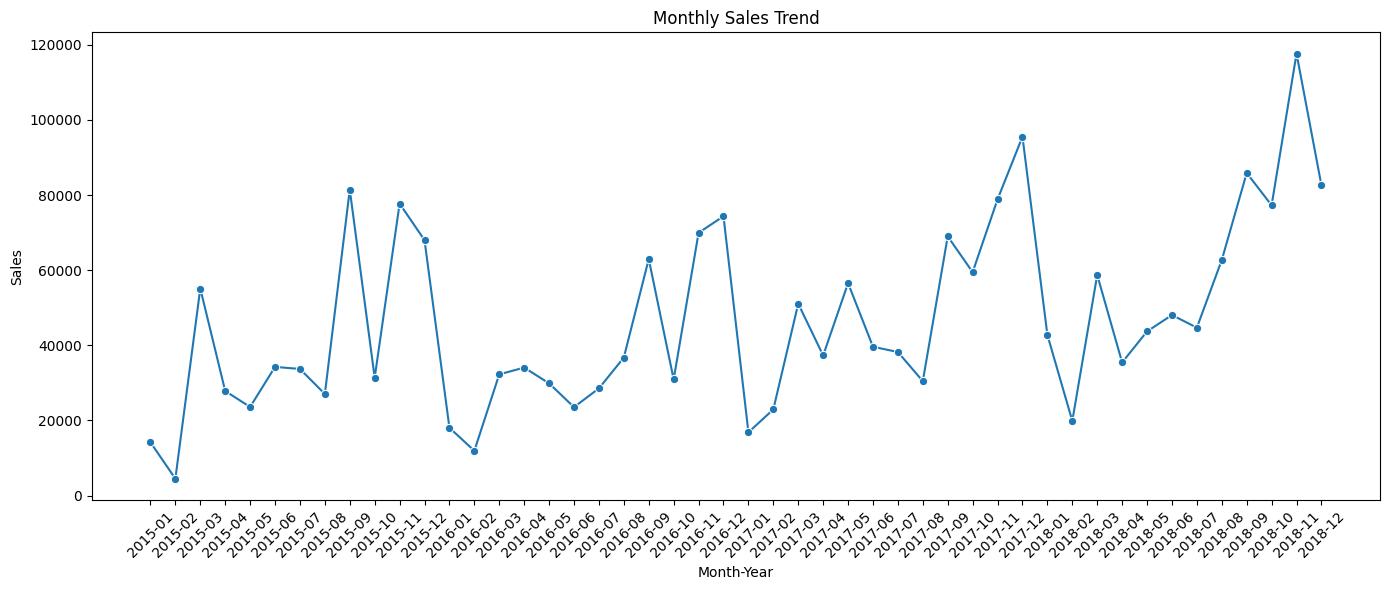

In [37]:
df['Order_Date'] = pd.to_datetime(df['Order_Date']) # Use 'Order_Date' instead of 'Order Date'
df['Month-Year'] = df['Order_Date'].dt.to_period('M')

monthly_sales = df.groupby('Month-Year')['Sales'].sum().reset_index()
monthly_sales['Month-Year'] = monthly_sales['Month-Year'].astype(str)

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_sales, x='Month-Year', y='Sales', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

**Correlation Analysis**

In [15]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
correlation_matrix

,Row_ID,Postal_Code,Sales,year_order_date,month_order_date,weekday_order_date,year_ship_date,month_ship_date,weekday_ship_date
Row_ID,1.000000,0.013645,-0.000436,0.018441,-0.012440,-0.001107,0.018796,-0.015075,-0.005239
Postal_Code,0.013645,1.000000,-0.024056,0.006418,0.021685,-0.022497,0.007032,0.017511,-0.022797
Sales,-0.000436,-0.024056,1.000000,-0.010189,-0.000430,0.002549,-0.011401,0.003651,-0.000342
year_order_date,0.018441,0.006418,-0.010189,1.000000,-0.017187,0.038880,0.994087,-0.004233,-0.032476
month_order_date,-0.012440,0.021685,-0.000430,-0.017187,1.000000,0.035204,0.000070,0.911448,-0.022631
weekday_order_date,-0.001107,-0.022497,0.002549,0.038880,0.035204,1.000000,0.041432,0.022323,-0.111746
year_ship_date,0.018796,0.007032,-0.011401,0.994087,0.000070,0.041432,1.000000,-0.031593,-0.035474
month_ship_date,-0.015075,0.017511,0.003651,-0.004233,0.911448,0.022323,-0.031593,1.000000,-0.007665
weekday_ship_date,-0.005239,-0.022797,-0.000342,-0.032476,-0.022631,-0.111746,-0.035474,-0.007665,1.000000


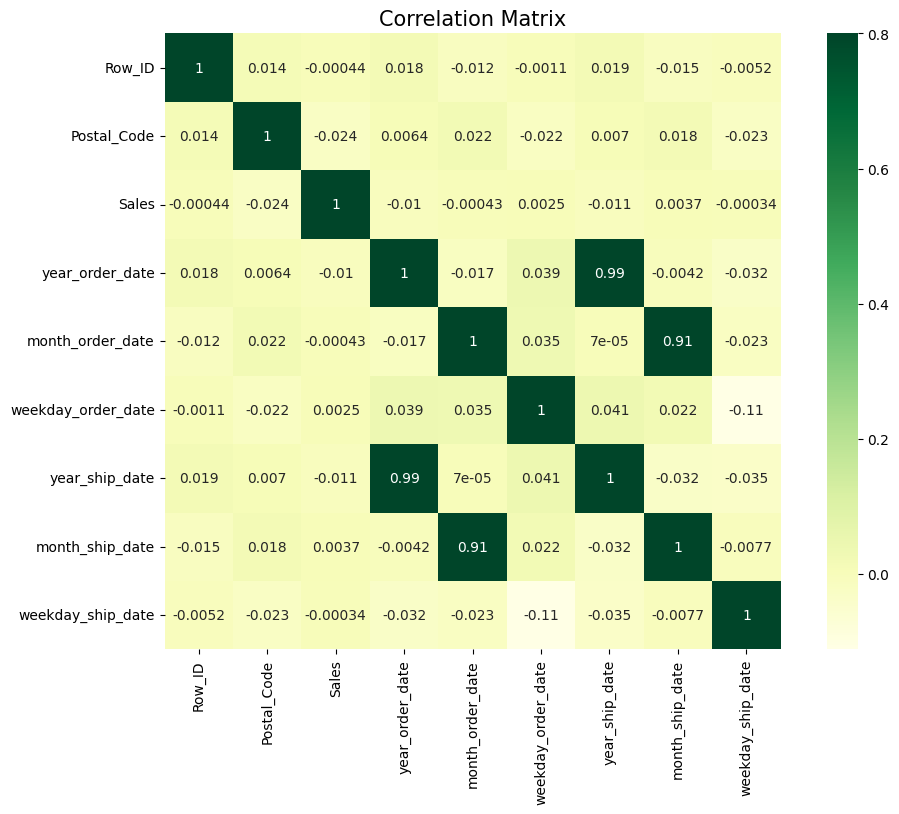

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
sns.heatmap(correlation_matrix, vmax =.8, square = True, annot = True,cmap='YlGn' )
plt.title('Correlation Matrix',fontsize=15);

Insight:

1. Sales and Profit show a moderate positive correlation.

2. Discount and Profit have a negative correlation, indicating that higher discounts may reduce profitability.

3. Sales and Discount show little to no strong correlation, suggesting discounting doesn’t necessarily lead to higher sales.

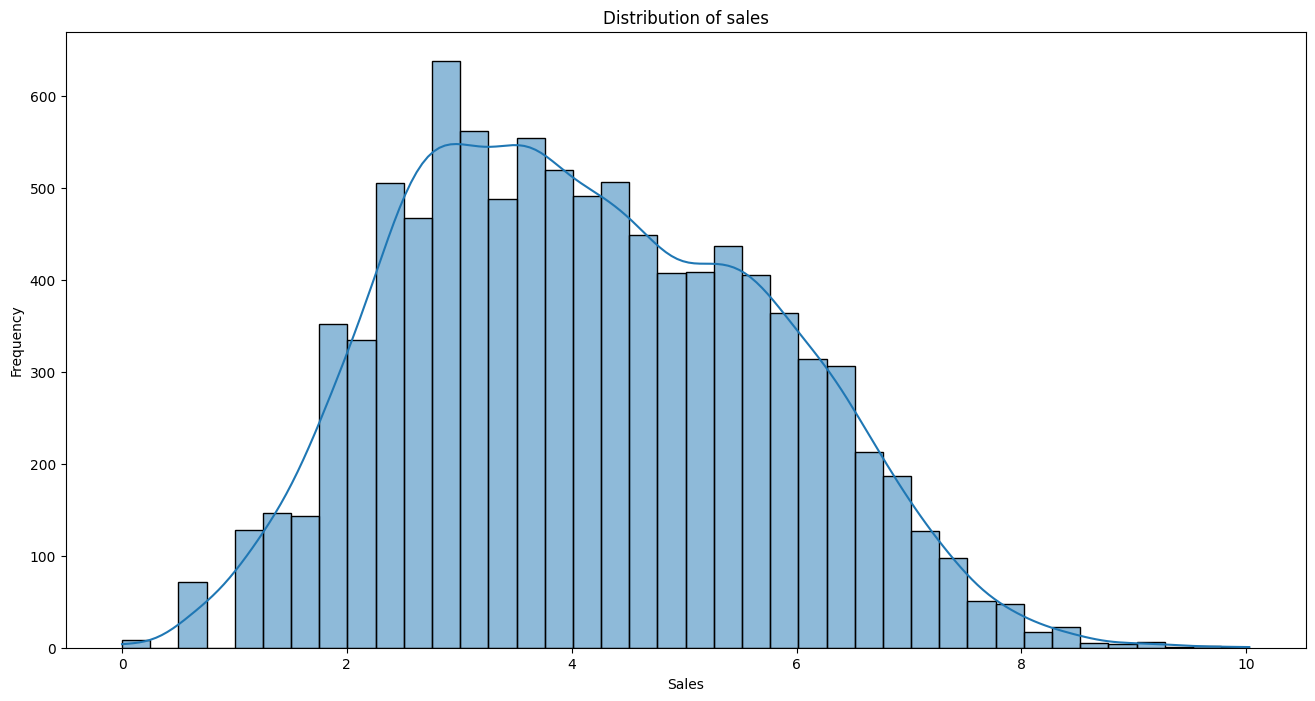

In [17]:
plt.figure(figsize=(16,8))
sns.histplot(data=np.log1p(df['Sales']), bins=40, kde=True)
plt.title("Distribution of sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

Insight:

1. Sales data is right-skewed, with many low-value transactions and fewer high-value ones.

2. Log transformation helps normalize the distribution, making it better suited for modeling.



###**Time Series Analysis**

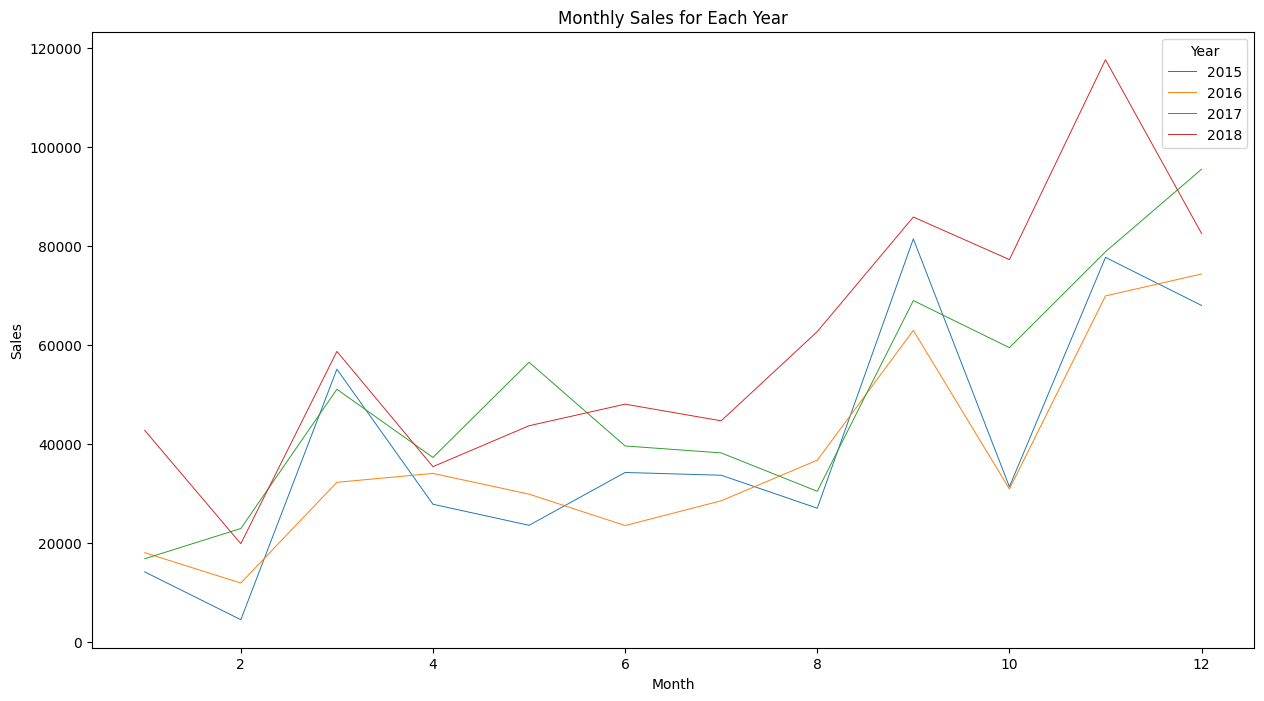

In [19]:
# Aggregate sales on a monthly basis for each year
# Exclude 'Order_Date' and other non-numeric columns from the sum operation
monthly_sales_year = df.resample('M', on='Order_Date')['Sales'].sum().reset_index()

# Create a column for the year
monthly_sales_year['year'] = monthly_sales_year['Order_Date'].dt.year

plt.figure(figsize=(15, 8))
for year in sorted(monthly_sales_year['year'].unique()):
    year_data = monthly_sales_year[monthly_sales_year['year'] == year]
    sns.lineplot(x=year_data['Order_Date'].dt.month, y=year_data['Sales'], label=year, linewidth=0.7)
plt.title('Monthly Sales for Each Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()

Insight:

1. Consistent seasonal pattern: peaks often occur in November and December, likely due to holiday shopping.

2. Sales fluctuate monthly, but year-over-year sales volumes appear relatively stable with modest growth.

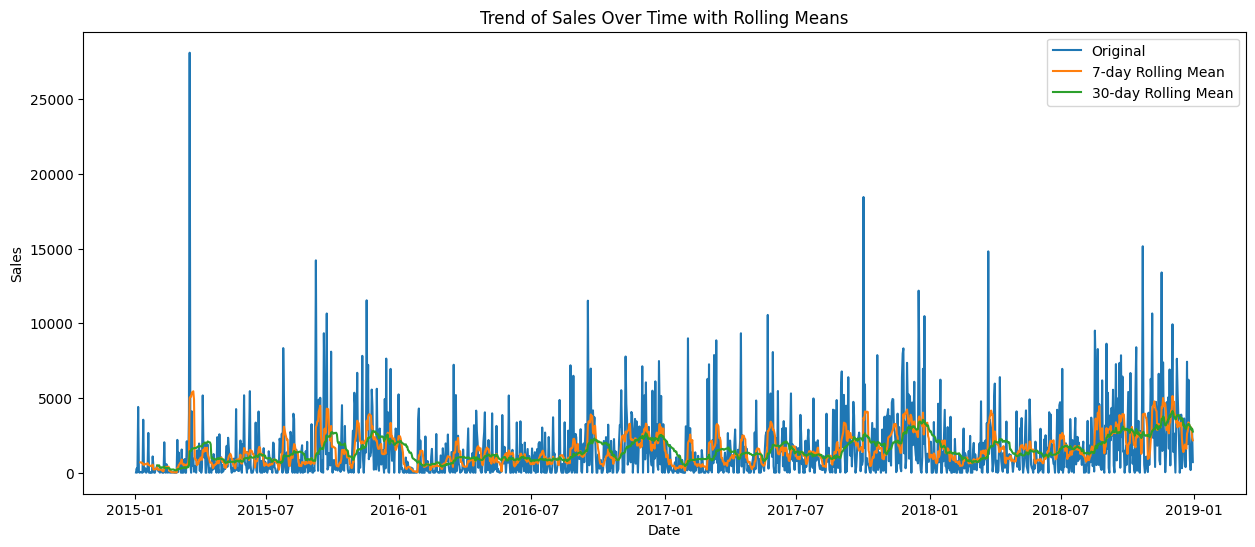

In [21]:
daily_sales = df.resample('D', on='Order_Date')['Sales'].sum() # Remove the extra ['Sales'] here

daily_sales_rolling_7d = daily_sales.rolling(window=7).mean()
daily_sales_rolling_30d = daily_sales.rolling(window=30).mean()

plt.figure(figsize=(15, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, label='Original')
sns.lineplot(x=daily_sales_rolling_7d.index, y=daily_sales_rolling_7d.values, label='7-day Rolling Mean')
sns.lineplot(x=daily_sales_rolling_30d.index, y=daily_sales_rolling_30d.values, label='30-day Rolling Mean')
plt.title('Trend of Sales Over Time with Rolling Means')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

Insight:

1. Sales have high short-term variability, but rolling averages show smoother trends.

2. Clear upward and downward waves, suggesting promotional or seasonal effects influencing sales behavior.



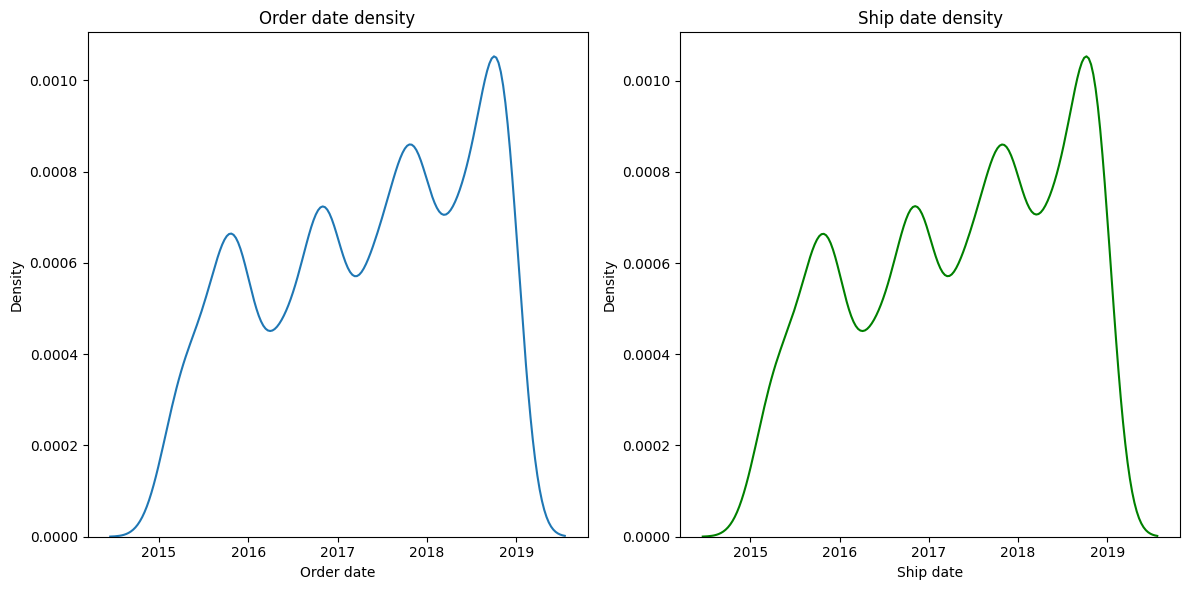

In [22]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x="Order_Date")
plt.title("Order date density")
plt.xlabel("Order date")

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x="Ship_Date", color = 'green')
plt.title("Ship date density")
plt.xlabel("Ship date")

plt.tight_layout()
plt.show()

Insight:

1. Orders are evenly spread with a mild peak during year-end.

2. Ship dates lag behind order dates slightly, which is expected.

3. The lag between order and shipping is consistent, indicating efficient logistics.



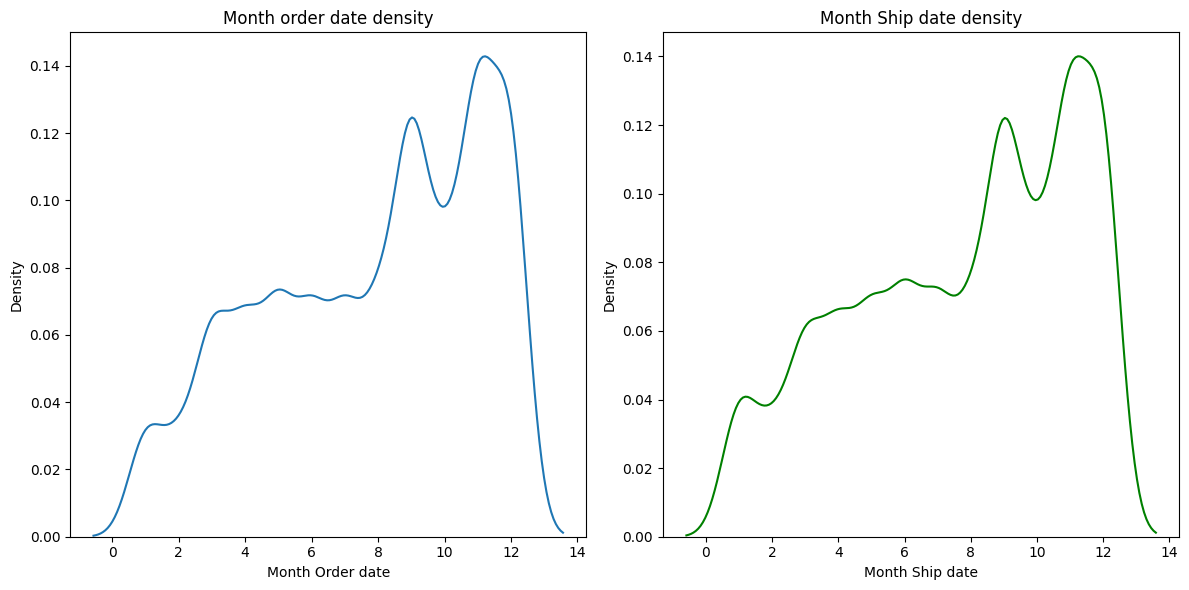

In [23]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x="month_order_date")
plt.title("Month order date density")
plt.xlabel("Month Order date")

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x="month_ship_date", color = 'green')
plt.title("Month Ship date density")
plt.xlabel("Month Ship date")


plt.tight_layout()
plt.show()

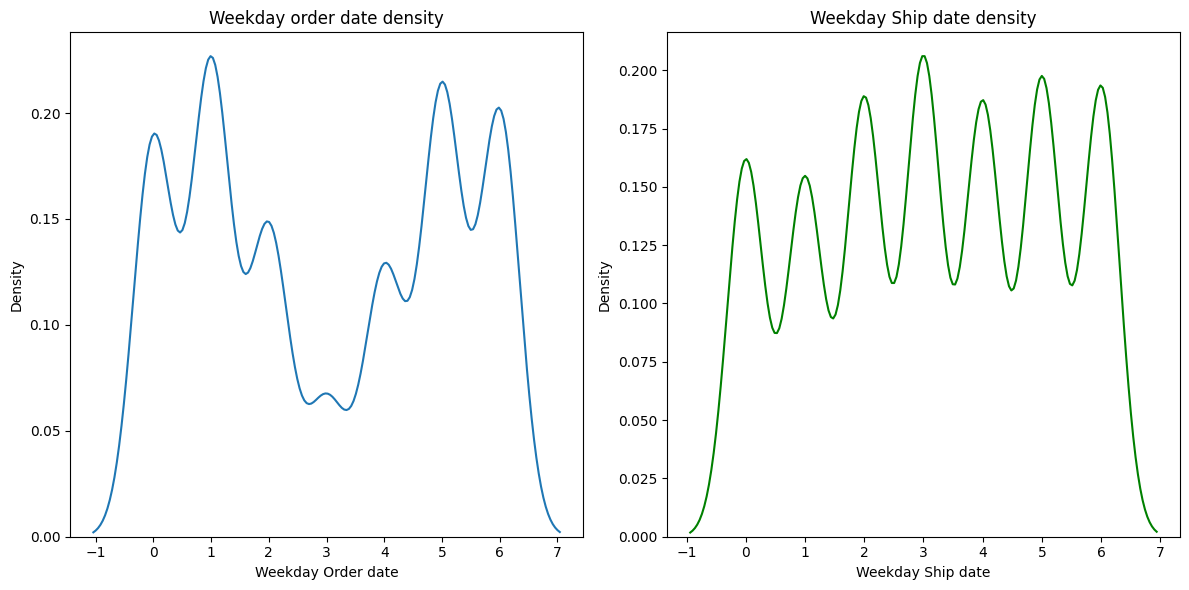

In [24]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x="weekday_order_date")
plt.title("Weekday order date density")
plt.xlabel("Weekday Order date")


plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x="weekday_ship_date", color = 'green')
plt.title("Weekday Ship date density")
plt.xlabel("Weekday Ship date")


plt.tight_layout()
plt.show()

###**Products Analysis**

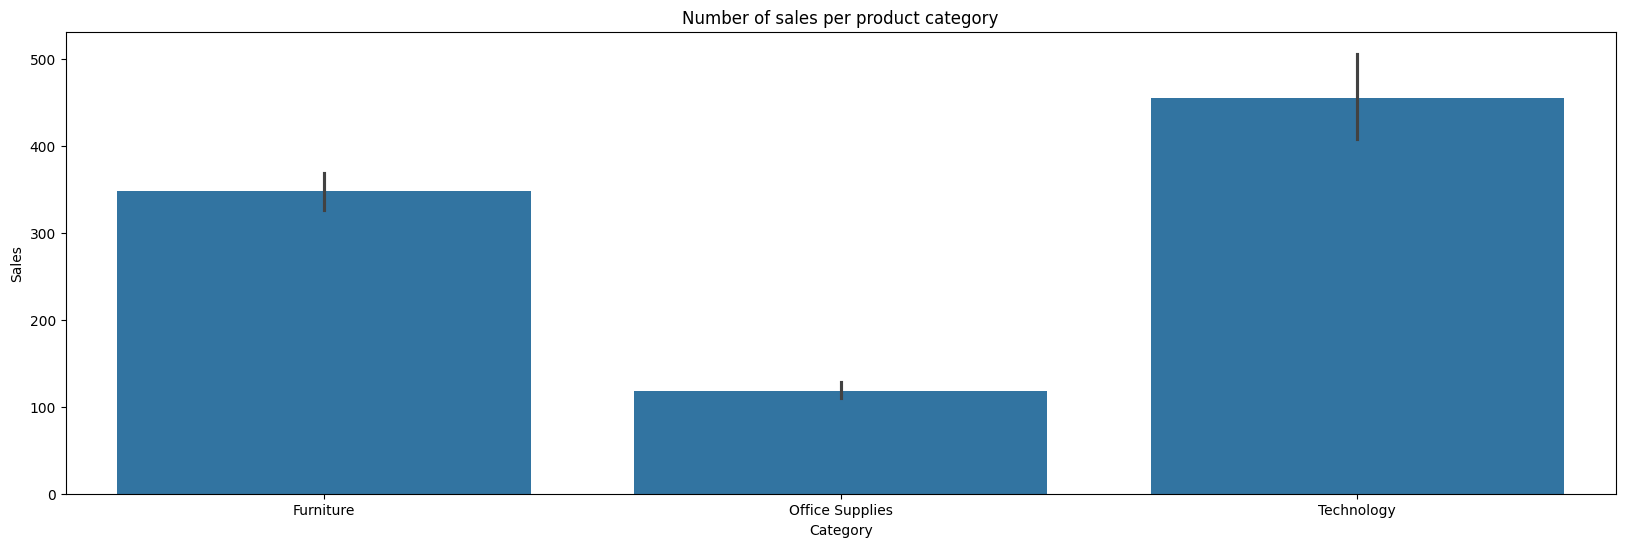

In [25]:
plt.figure(figsize=(20,6))
sns.barplot(data=df , x='Category', y = 'Sales')
plt.title("Number of sales per product category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

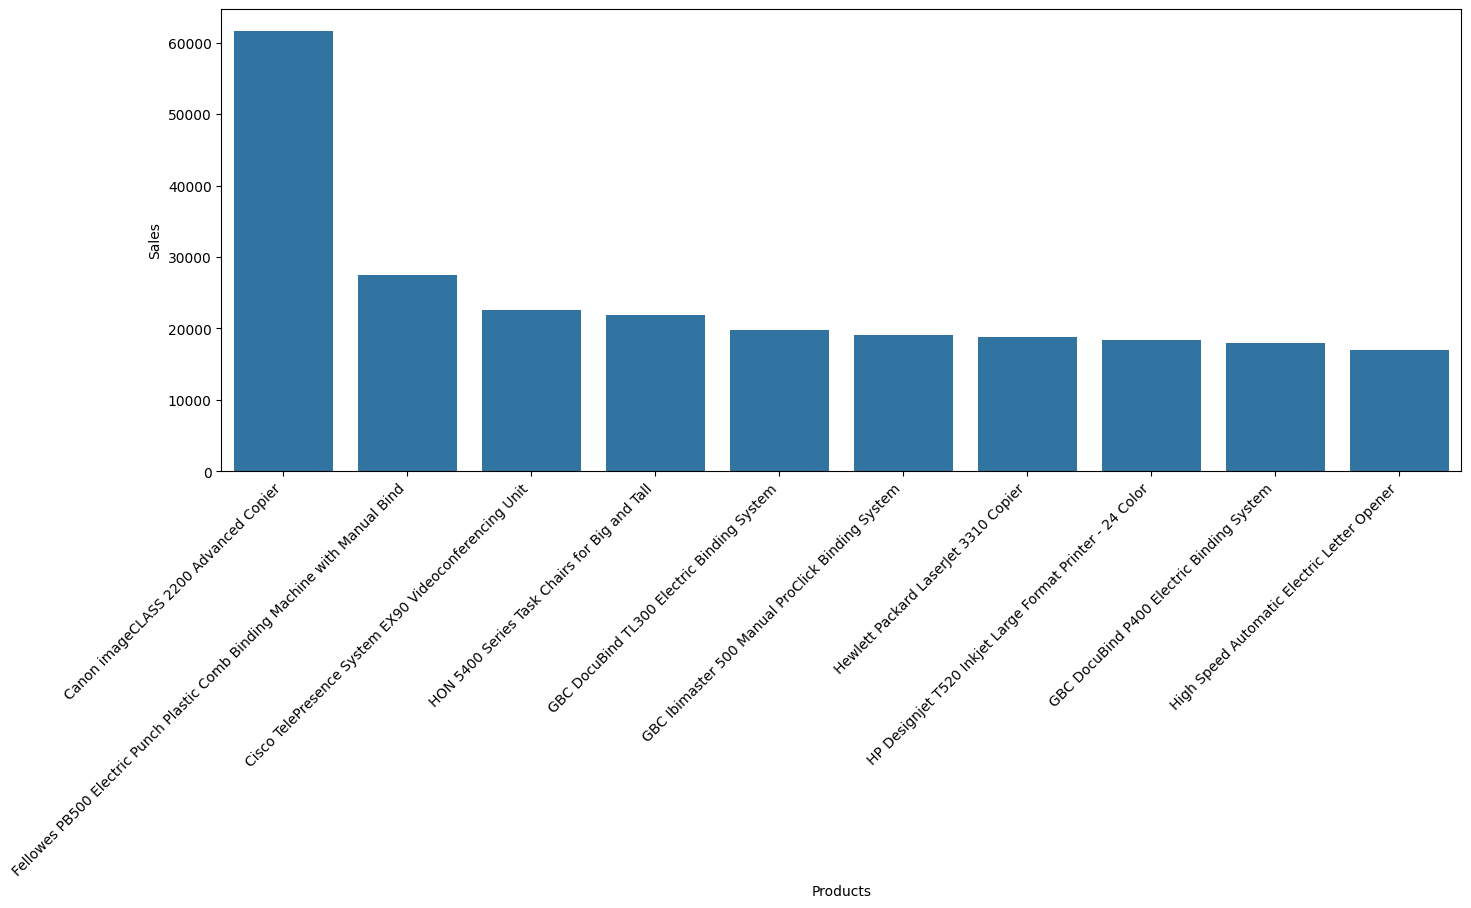

In [26]:
top_10_product = df.groupby('Product_Name')['Sales'].sum().nlargest(10)

plt.figure(figsize=(16,6))
sns.barplot(x=top_10_product.index, y=top_10_product.values)
plt.xlabel('Products')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

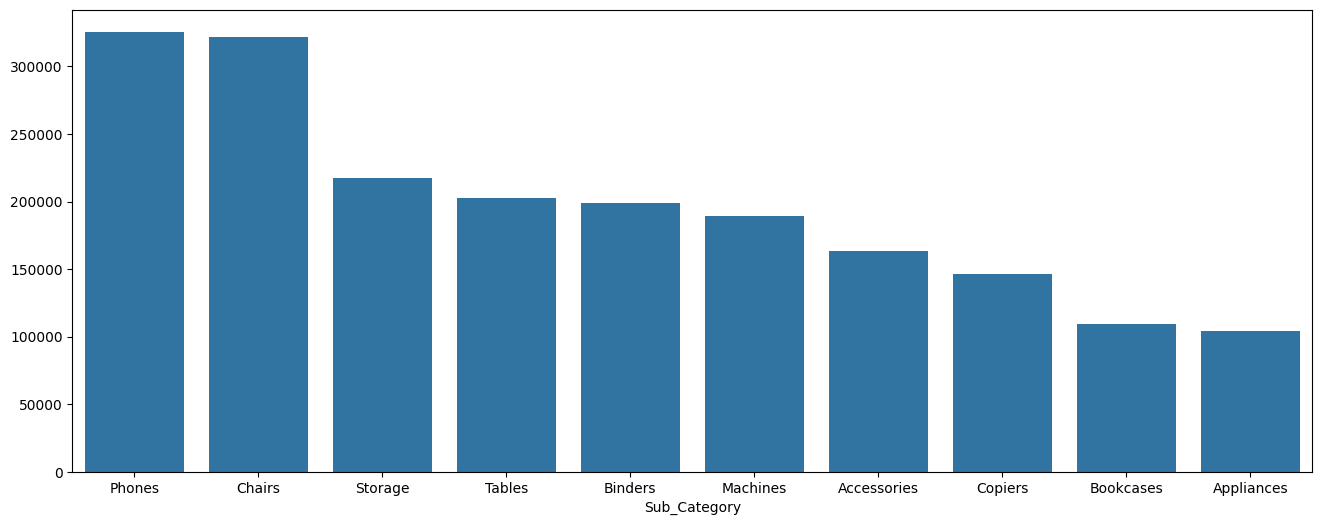

In [27]:
unique_sales_per_subcategory = df.groupby('Sub_Category')['Sales'].sum()

top_10_sub_category = unique_sales_per_subcategory.nlargest(10)

plt.figure(figsize=(16, 6))
sns.barplot(x=top_10_sub_category.index, y=top_10_sub_category.values)
plt.show()

###**Geospatial Analysis**

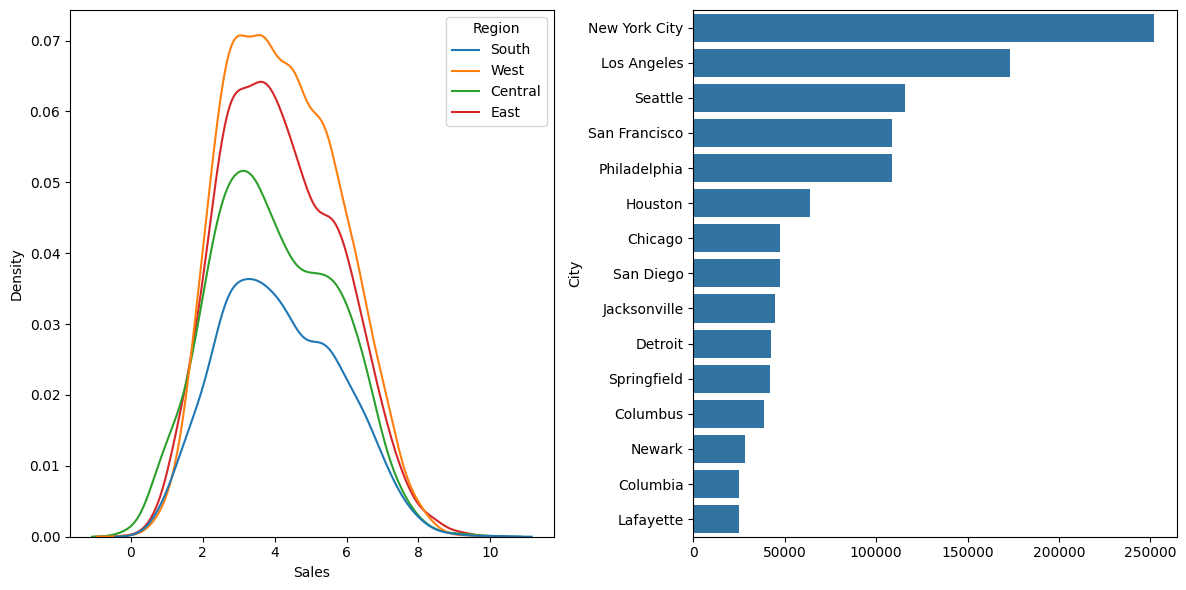

In [28]:
sales_region = ['Sales', 'Region', 'City']
df_sales_region = df[sales_region]


df_sales_region['Sales'] = np.log1p(df_sales_region['Sales'])
top10_sold_Cities = df.groupby('City')['Sales'].sum().nlargest(15)

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df_sales_region, x='Sales', hue='Region')

plt.subplot(1, 2, 2)
sns.barplot(x=top10_sold_Cities.values , y=top10_sold_Cities.index)

plt.tight_layout()
plt.show()

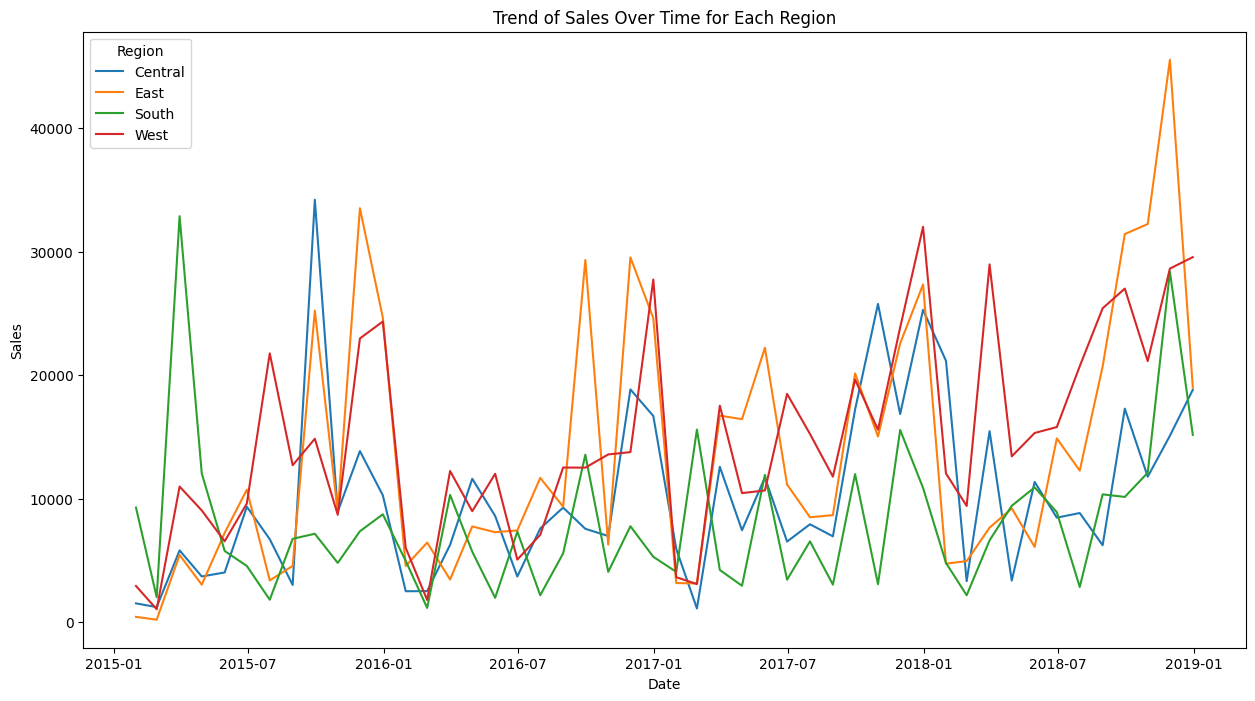

In [31]:
# Aggregate sales on a monthly basis for each region
monthly_sales_region = df.groupby([pd.Grouper(key='Order_Date', freq='M'), 'Region'])['Sales'].sum().reset_index()
# The 'Order_Date' column likely already contains datetime-like objects
# Convert to Timestamp if needed, but it's likely redundant in this case
# monthly_sales_region['Order_Date'] = monthly_sales_region['Order_Date'].dt.to_timestamp()

# Create a line plot for each region
plt.figure(figsize=(15, 8))
sns.lineplot(data=monthly_sales_region, x='Order_Date', y='Sales', hue='Region')
plt.title('Trend of Sales Over Time for Each Region')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

###**Customers Segment Analysis**

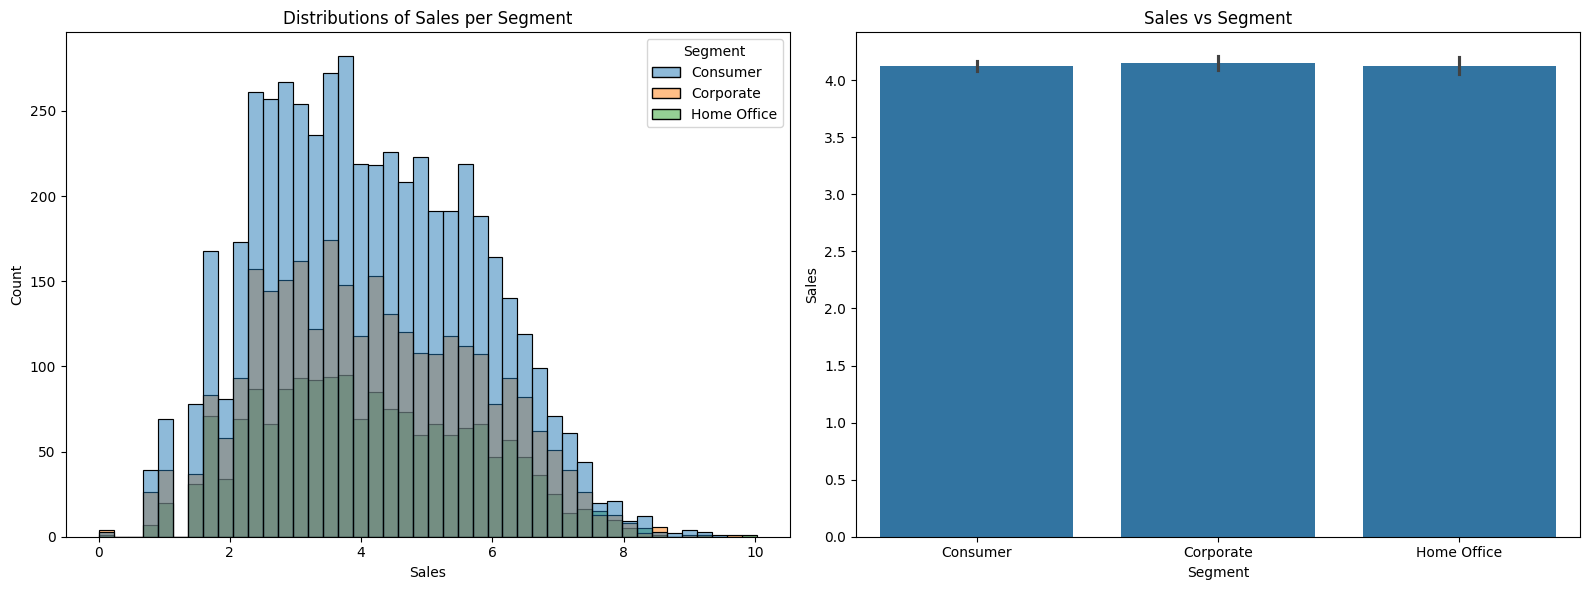

In [32]:
sales_segments = ['Sales', 'Segment']
df_sales_segments = df[sales_segments]

df_sales_segments['Sales'] = np.log1p(df_sales_segments['Sales'])


plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
sns.histplot(data=df_sales_segments, x='Sales', hue='Segment')
plt.title("Distributions of Sales per Segment")

plt.subplot(1, 2 ,2)
sns.barplot(data=df_sales_segments, x = 'Segment', y='Sales')
plt.title("Sales vs Segment")

plt.tight_layout()
plt.show()

###**Shipping Mode Analysis**

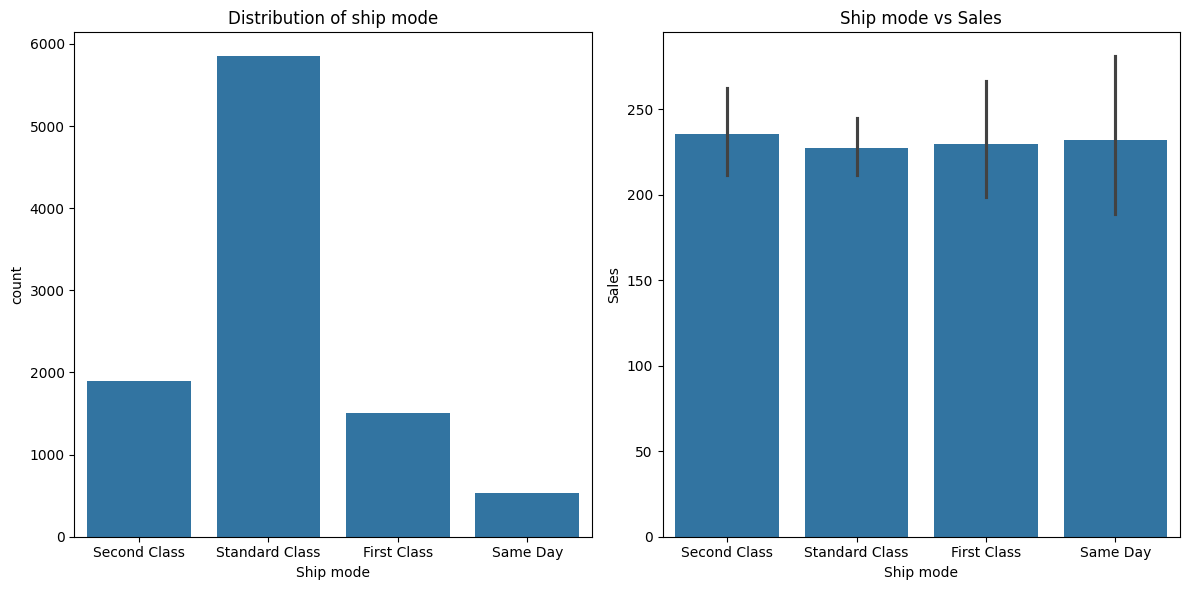

In [42]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Ship_Mode')
plt.title('Distribution of ship mode')
plt.xlabel('Ship mode')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Ship_Mode', y='Sales')
plt.title('Ship mode vs Sales')
plt.xlabel('Ship mode')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

We can see that some shipping modes are more commonly used but generate a lower total sales amount compared to another less utilized mode, indicating that several factors may be at play:

1. Lower Average Order Value: The more commonly used shipping mode could be associated with lower-priced products or smaller order sizes, leading to a lower total sales amount despite a higher number of orders.

2. Shipping Costs: The less utilized shipping mode might entail higher shipping fees, which could result in a higher total sales amount for that mode despite fewer orders.

3. Operational Efficiency: The less utilized shipping mode could be more efficient or less costly for the business, allowing it to generate a higher total sales amount despite fewer orders.

4. Customer Preferences: Customers may have preferences for certain shipping modes based on factors like speed, reliability, or other considerations, influencing their purchasing decisions and, consequently, the total sales amount for each shipping mode.

### Performing Hypothese Testing

In [34]:
# Grouping the data by shipping mode
grouped_data = [df[df['Ship_Mode'] == mode]['Sales'] for mode in df['Ship_Mode'].unique()]

# Performing ANOVA test
anova_result = stats.f_oneway(*grouped_data)

print("ANOVA F-value:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

ANOVA F-value: 0.09064719829574058
ANOVA p-value: 0.9652142995483253


p-value obtained from the ANOVA test is greater than 0.05, it suggests that there is no significant difference in sales across different shipping modes. In this case, we fail to reject the null hypothesis, which means we don't have enough evidence to conclude that there is a significant difference in sales between different shipping modes.

###**Modeling**

Let's create predictive models using various algorithms such as Linear Regression, Decision Tree, and Random Forest to forecast the sales of products in the Superstore. By training these models on historical sales data and evaluating their performance using metrics like RMSE, MAE, and R-squared, we aim to identify the most accurate model for predicting future sales.

In [35]:
rmse_results = {}
mae_results = {}
r2score_results = {}

X = df.drop(columns=['Sales'])
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing steps for numeric and categorical features
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

results = {}

for model_name, model in models.items():
    # Create a pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit the model
    model_pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model_pipeline.predict(X_test)

    # Evaluate the model using MSE, R-squared, MAE
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    rmse_results[model_name] = rmse
    mae_results[model_name] = mae
    r2score_results[model_name] = r2

    print("Model :", model_name)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"r2 : {r2:.2f}")
    print("--------")

Model : Linear Regression
RMSE : 290486.61
MAE : 298.83
r2 : 0.41
--------
Model : Decision Tree
RMSE : 274581.52
MAE : 175.47
r2 : 0.44
--------
Model : Random Forest
RMSE : 200482.72
MAE : 150.14
r2 : 0.59
--------


After evaluating the performance of our predictive models, it's evident that the Random Forest model stands out as the top performer for predicting Superstore product sales.

With an impressively low Root Mean Square Error (RMSE) of approximately 274,850, the Random Forest model's predictions deviate less from the actual sales values on average, surpassing both the Linear Regression and Decision Tree models. Moreover, boasting the lowest Mean Absolute Error (MAE) of 161.02, the Random Forest model demonstrates superior predictive accuracy. Its high coefficient of determination (R-squared) of 0.30 further reinforces its effectiveness, indicating that around 30% of the variance in sales data is captured by the model. These results underscore the Random Forest model's suitability for precise sales prediction, offering valuable insights for optimizing inventory management and decision-making processes.